In [145]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [146]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [147]:
#X_reg, y_reg =     회귀
#X_clf, y_clf =     분류

X_reg, y_reg = fetch_california_housing(return_X_y=True)

In [148]:
# 위 코드 판다스로 지정해 불러올때

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)

X_reg = df.values
y_reg = data.target

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_reg,y_reg, test_size=0.3, random_state=42)

In [150]:
dt_reg = DecisionTreeRegressor()            #max_depth=7 를 지정할 수 있음(알고리즘 안에 지정 후 이후 작업은 안함)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [151]:
y_pred = dt_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("평균 제곱 오차(MSE): ", mse)

평균 제곱 오차(MSE):  0.5326127380759205


In [152]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


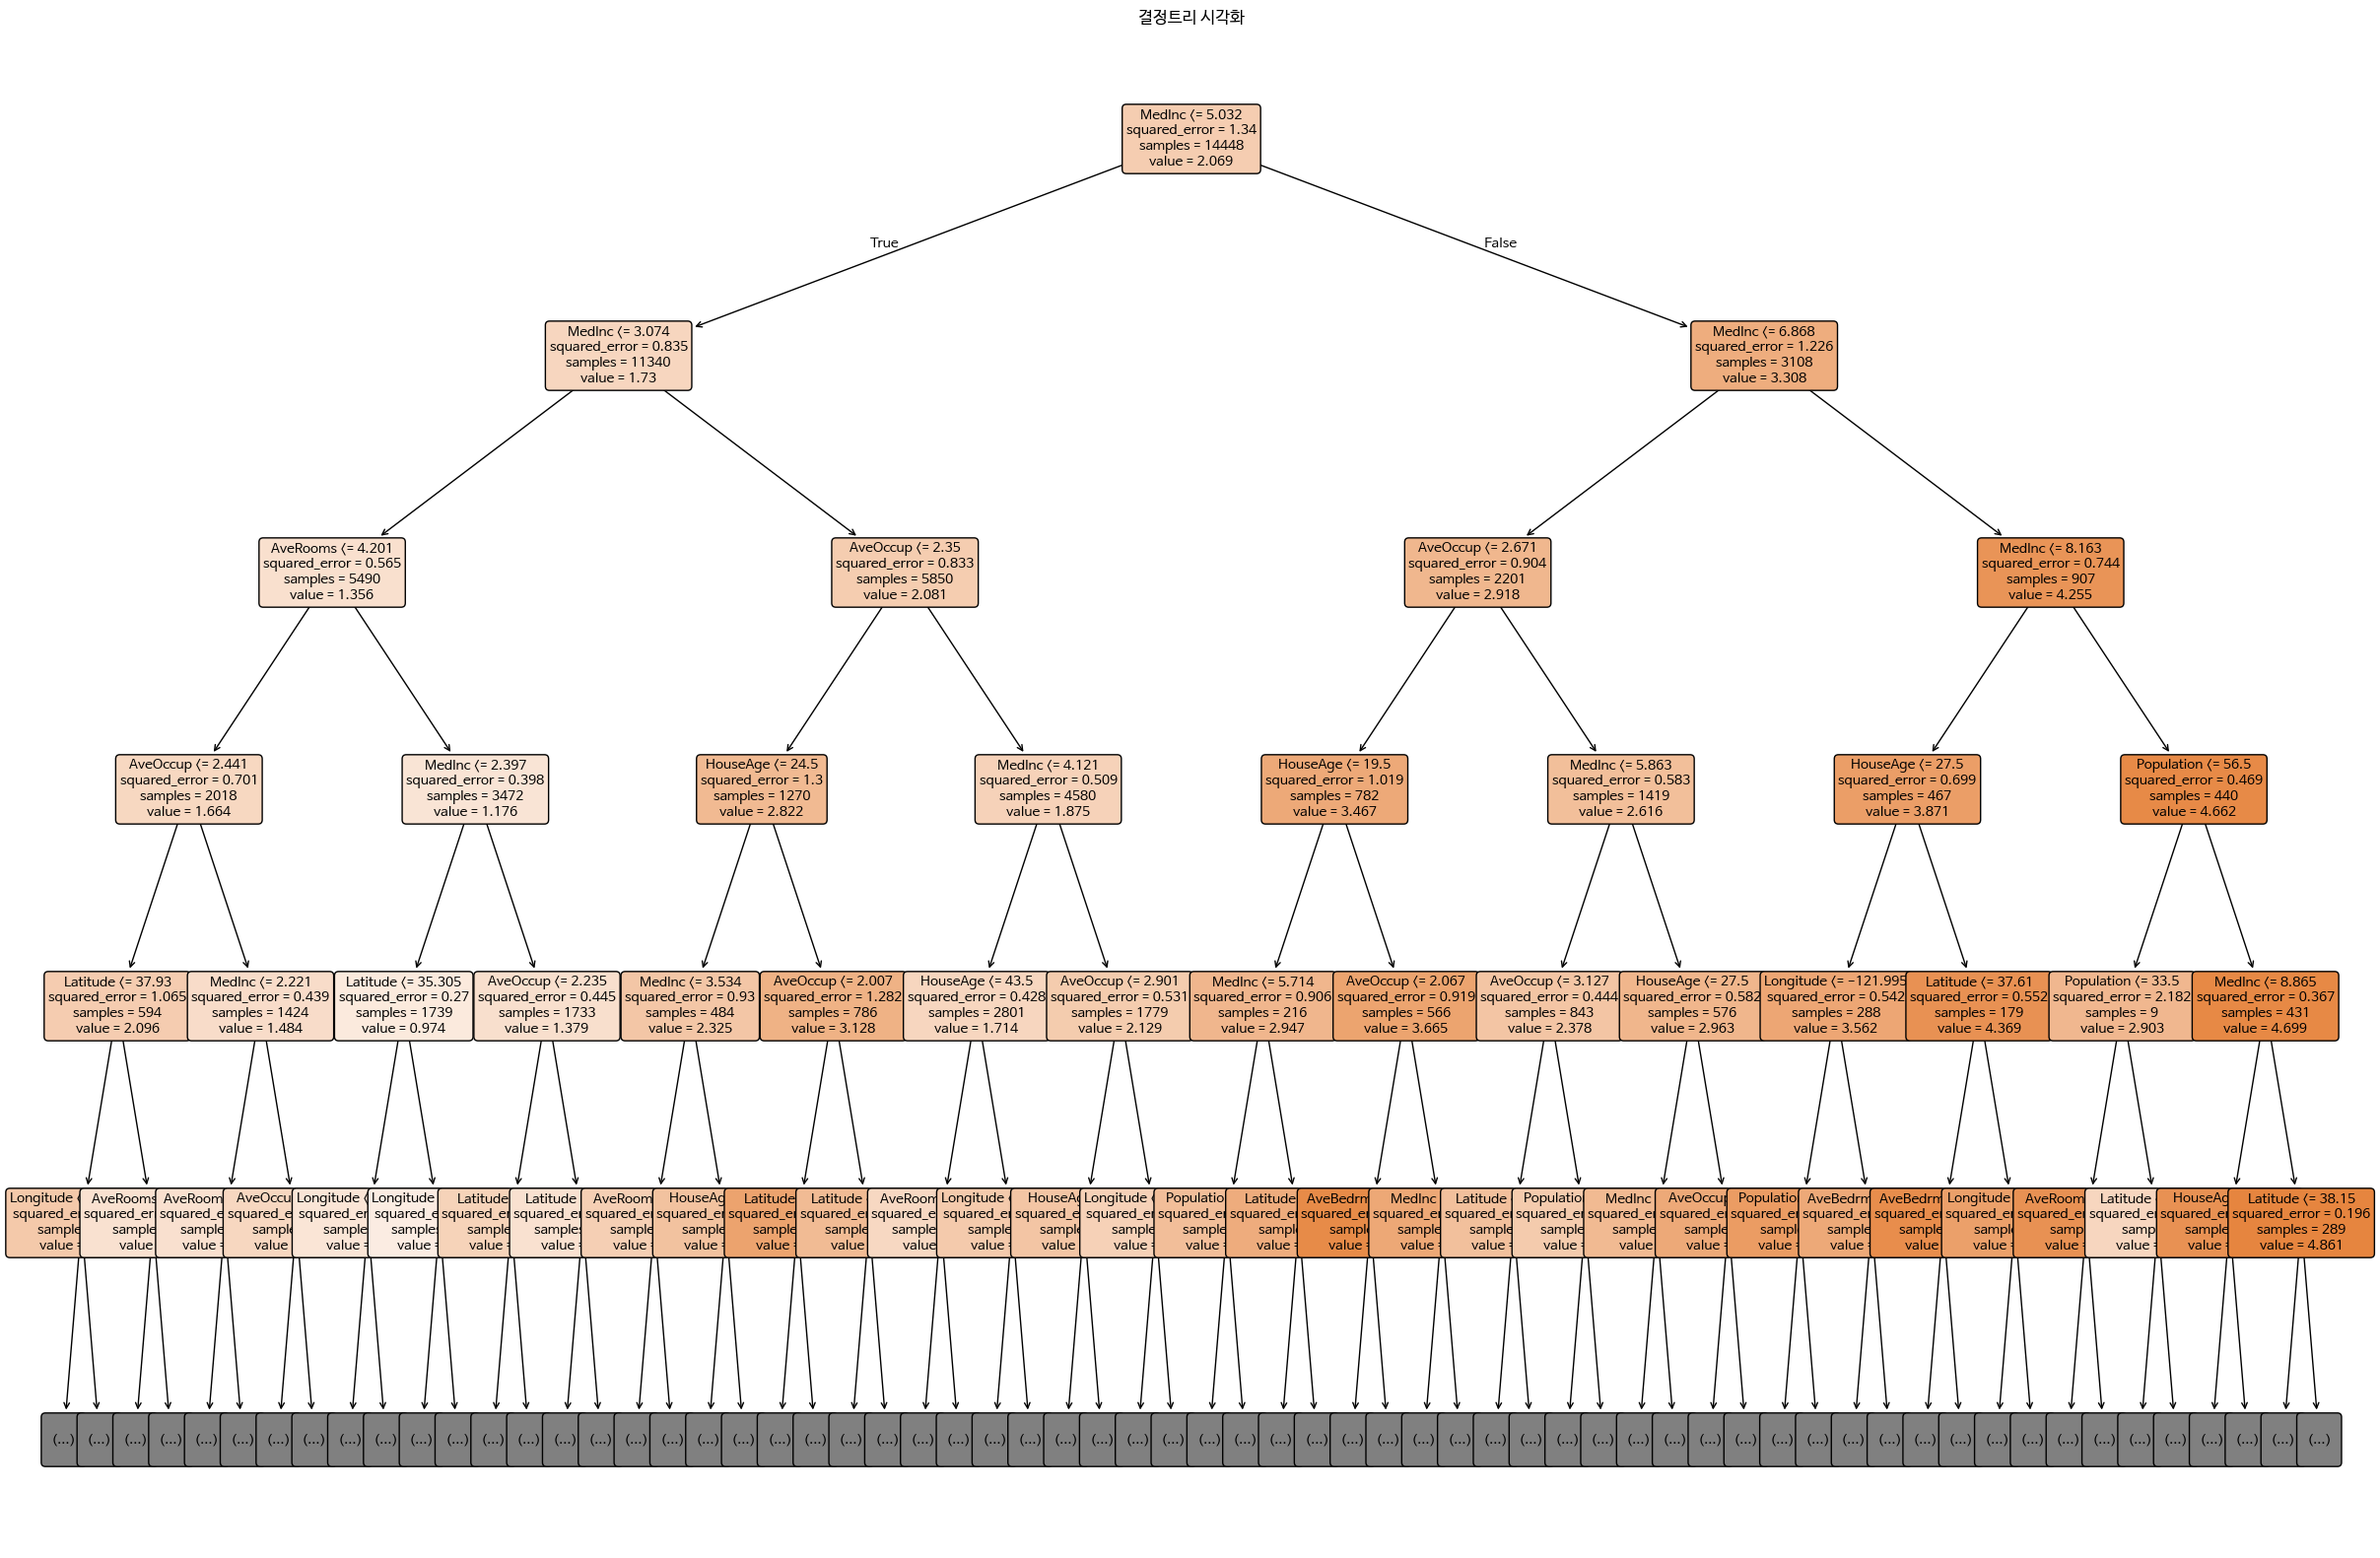

In [153]:
from sklearn.tree import plot_tree

# 트리 시각화

plt.figure(figsize=(30, 20))
plot_tree(dt_reg,
          max_depth=5,                      # 모델은 깊이 만들어 졌는데 시각화만 두개만 하자
          filled=True,                      # 색상을 채워줘
          rounded=True,                     # 박스의 모서리 라운드
          fontsize=10,
          feature_names=data.feature_names
          )
plt.title('결정트리 시각화')
plt.show()


# DT 분류 실습

In [154]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree

In [155]:
iris = load_iris()
X_clf = iris.data
y_clf = iris.target

In [156]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [157]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [158]:
# 변수명 추출

feature_names_clf = iris.feature_names
class_names_clf = iris.target_names

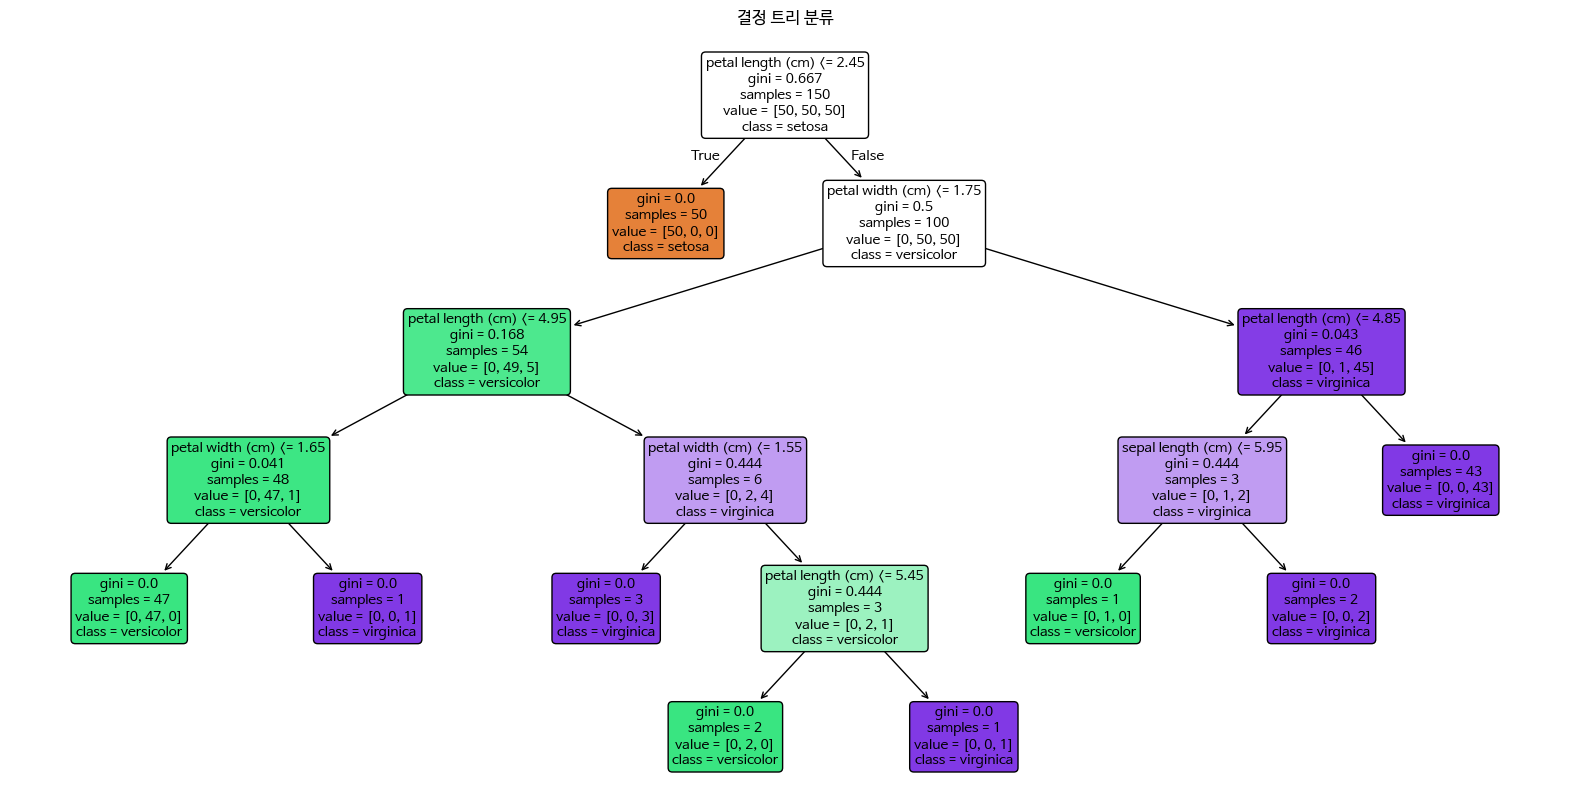

In [159]:
dt_clf = DecisionTreeClassifier(random_state=42)        # max_depth=3를 넣으면 원하는 뎁스 값 볼수 있다.
dt_clf.fit(X_clf, y_clf)

plt.figure(figsize=(20,10))
plot_tree(
    dt_clf,
    feature_names=feature_names_clf,
    class_names=class_names_clf,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("결정 트리 분류")
plt.show()

max_depth를 9로 해도 5depth가 끝

In [160]:
dt_clf.get_depth()              # 전체 depth 보는 코드

5

# 속성 중요도 실습

In [161]:
# 특성 이름 가져오기

feature_names = iris.feature_names

In [162]:
# 각 특성의 중요도 값 가져오기
importances = dt_clf.feature_importances_

In [163]:
importances

array([0.01333333, 0.        , 0.56405596, 0.42261071])

In [164]:
importances_df = pd.DataFrame({
    'Feature' : feature_names,
    'Importance' : importances
    })
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

,Feature,Importance
2,petal length (cm),0.564056
3,petal width (cm),0.422611
0,sepal length (cm),0.013333
1,sepal width (cm),0.000000


# 4. 사전 가지치기 실습

In [165]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [166]:
iris = load_iris()
X_clf = iris.data
y_clf = iris.target

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

In [168]:
# 하이퍼 파리미터 조합

dt_model_2 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',

)
dt_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)

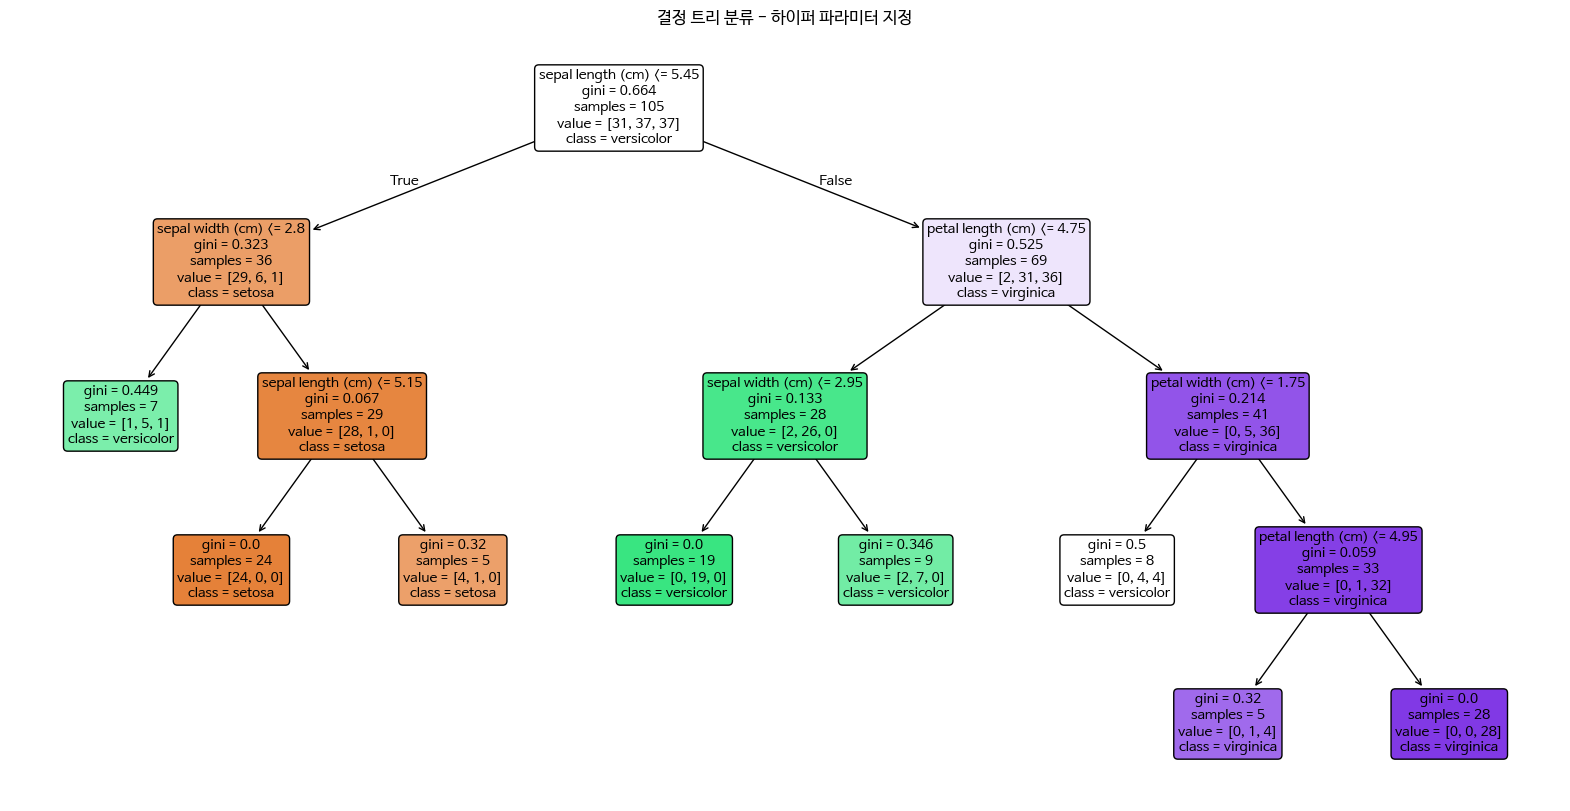

In [169]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_model_2,
    feature_names=feature_names_clf,
    class_names=class_names_clf,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("결정 트리 분류 - 하이퍼 파라미터 지정")
plt.show()

# 1. 단일 디시전 트리 실습

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap                # 결정 경계 시각화 라이브러리(모델링과는 상관은 없음)

In [171]:
# make_moons 데이터 불러오기-암기 nono

X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

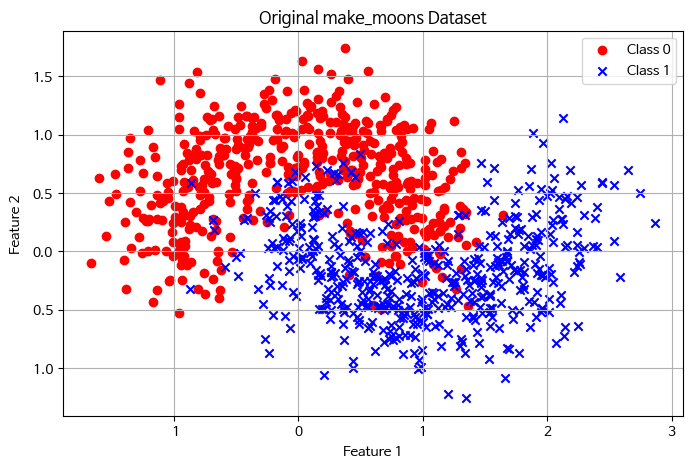

In [172]:
# 데이터셋 시각화 (어떻게 생겼는지 눈으로 확인)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', marker='o', label='Class 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', marker='x', label='Class 1')
plt.title('Original make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
dt_clf = DecisionTreeClassifier(max_depth=7)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [192]:
y_pred_dt = dt_clf.predict(X_test)

In [193]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.9166666666666666

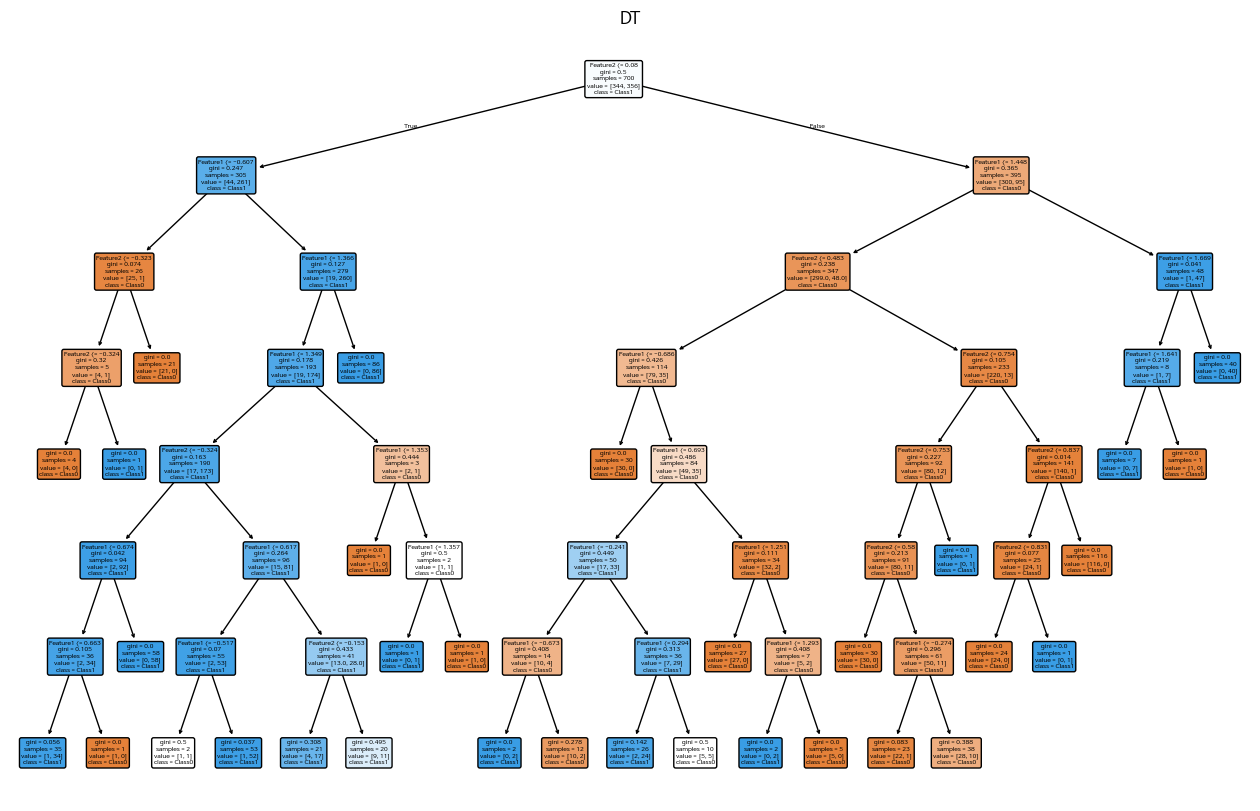

In [194]:
from sklearn.tree import plot_tree

plt. figure(figsize=(16, 10))
plot_tree(
    dt_clf,
    filled=True,
    rounded=True,
    feature_names=['Feature1', 'Feature2'],
    class_names=['Class0', 'Class1']
)
plt.title('DT')
plt.show()

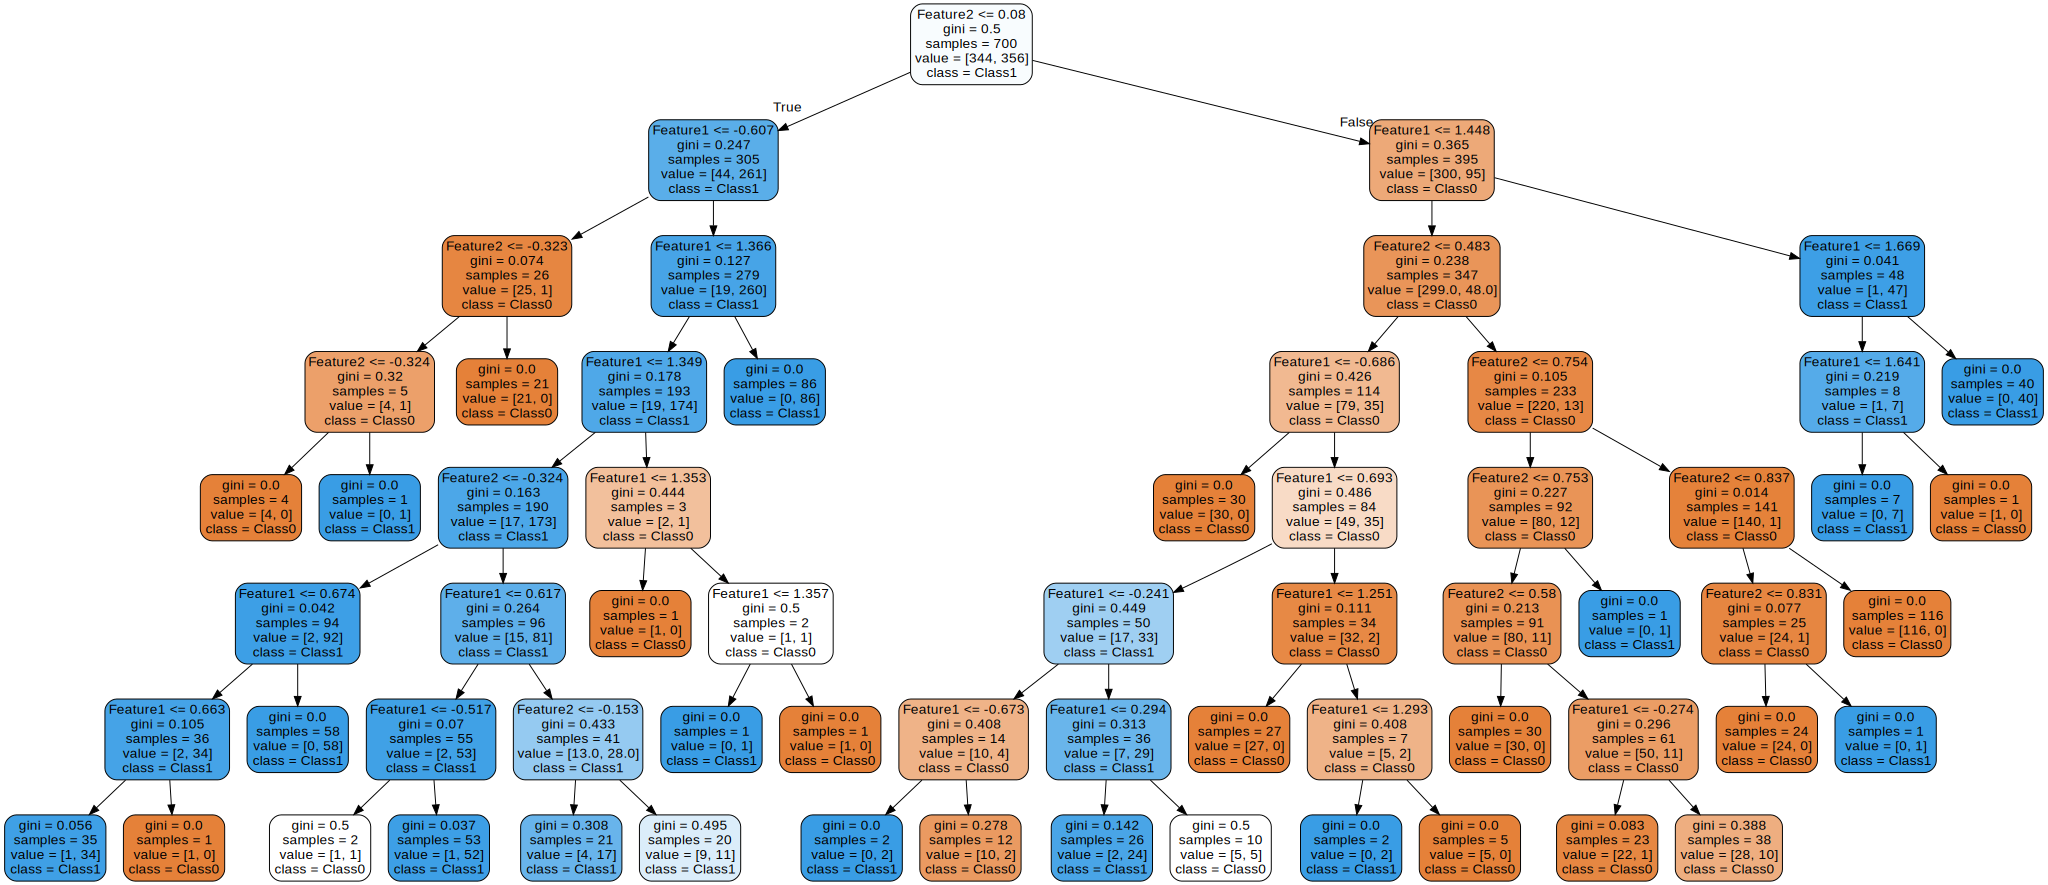

In [195]:
# 추가 - 보기 좋은 시각화

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt_clf,
    feature_names=['Feature1', 'Feature2'],
    class_names=['Class0', 'Class1'],
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data)

graph

In [196]:
# 산점도 시각화할 함수 정의

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # 컬러맵 정의
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # 배경 색
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # 점 색

    # 그리드 영역 설정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 모델로 예측한 결정 경계
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 시각화
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)  # 결정 경계 색
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

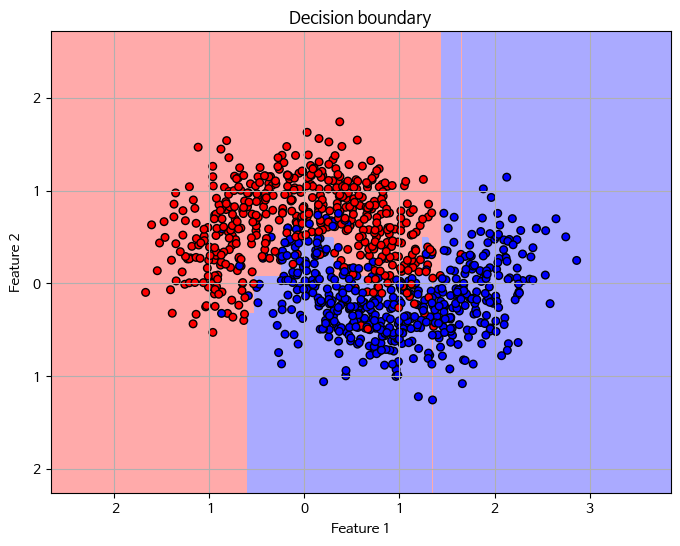

In [197]:
plot_decision_boundary(dt_clf, X, y, title='Decision boundary')

# 랜덤 포레스트 실습

In [198]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=7, n_jobs=-1)
# n_estimators= (중요함) 결정트리 몇개쓸꺼야? 라는 의미
# n_jobs= "너가 할수 있는 컴퓨팅 메모리등 가져올 수 있는거 다 가져와"
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_jobs=-1)

In [199]:
y_pred_rf = rf_clf.predict(X_test)

In [200]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9133333333333333

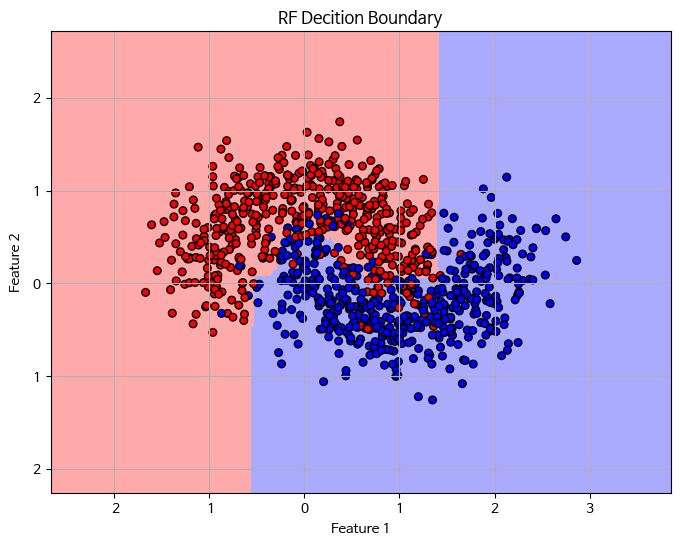

In [201]:
plot_decision_boundary(rf_clf, X, y, title="RF Decition Boundary")